In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et, viz_tools
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestSi/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fD2=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia2_T*.nc')[0])

In [5]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon', 'bounds_lat',
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))

In [6]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon', 'bounds_lat',
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
           'layer6m_W', 'layer6m_W_bounds')
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [7]:
checkall(fP)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'TB1_NO3', 'TB2_NO3', 'TB3_NO3', 'TA3_NO3', 'TN3_NO3', 'TB1_NH4', 'TB2_NH4', 'TB3_NH4', 'TA3_NH4', 'TN3_NH4', 'RIV_NO3', 'RIV_NH4'])
Min/Max:
TB1_NO3 : 0.0 2685507.2
TB2_NO3 : 0.0 2685507.2
TB3_NO3 : 0.0 2685507.2
TA3_NO3 : 0.0 2685512.2
TN3_NO3 : 0.0 2685492.2
TB1_NH4 : 0.0 214239.45
TB2_NH4 : 0.0 214241.19
TB3_NH4 : 0.0 214241.19
TA3_NH4 : 0.0 214239.27
TN3_NH4 : 0.0 214239.27
RIV_NO3 : 0.0 10410.278
RIV_NH4 : 0.0 5788.9


In [8]:
checkall(fD)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'ATF_bSi', 'ATF_Si', 'REM_NO3', 'PRD_NO3', 'PRD_NH4', 'TBS_DIAT', 'TBS_PON'])
Min/Max:
ATF_NO3 : -2.4161732 2.0754504
ATF_NH4 : -0.56770843 1.7759498
ATF_DON : -0.47563046 0.85519034
ATF_PON : -3.6197355 2.9023535
ATF_LIV : -4.230829 3.2096367
ATF_bSi : -28.580217 39.19824
ATF_Si : -3.8097353 4.532069
REM_NO3 : 0.0 9.581778
PRD_NO3 : -21.759218 -0.0
PRD_NH4 : -5.907855 -0.0
TBS_DIAT : -14.828994 16.169094
TBS_PON : -34.295723 25.525238


In [9]:
checkall(fD2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHS_NO3', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV', 'SMS_NO3', 'SMS_NH4', 'SMS_DON', 'SMS_PON', 'SMS_LIV', 'SMS_Si', 'SMS_bSi'])
Min/Max:
PHS_NO3 : -437.6063 383.81223
PHS_NH4 : -61.002792 64.72221
PHS_DON : -48.269497 59.22118
PHS_PON : -30.01169 36.59474
PHS_LIV : -78.68599 80.143776
SMS_NO3 : -21.748274 9.581778
SMS_NH4 : -5.115639 16.001923
SMS_DON : -4.2821913 7.722708
SMS_PON : -6.4425325 11.967412
SMS_LIV : -39.890717 17.814753
SMS_Si : -34.29189 40.7974
SMS_bSi : -39.4043 29.344027


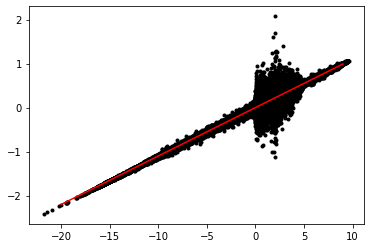

In [10]:
plt.plot(np.ma.masked_where(tmask==0,fD2.variables['SMS_NO3'][-1,:,:,:]).flatten(),np.ma.masked_where(tmask==0,fD.variables['ATF_NO3'][-1,:,:,:]).flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

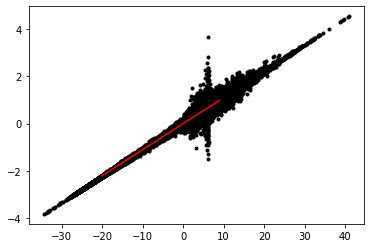

In [12]:
plt.plot(np.ma.masked_where(tmask==0,fD2.variables['SMS_Si'][-1,:,:,:]).flatten(),np.ma.masked_where(tmask==0,fD.variables['ATF_Si'][-1,:,:,:]).flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

(array([ 3., 11., 41., 83., 53., 48., 20.,  6.,  3.,  2.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

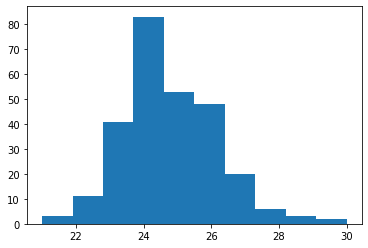

In [13]:
ind=np.argwhere(np.abs((fD.variables['ATF_NO3'][-1,:,:,:]-.11*fD2.variables['SMS_NO3'][-1,:,:,:]))>.5)
plt.hist(ind[:,0])

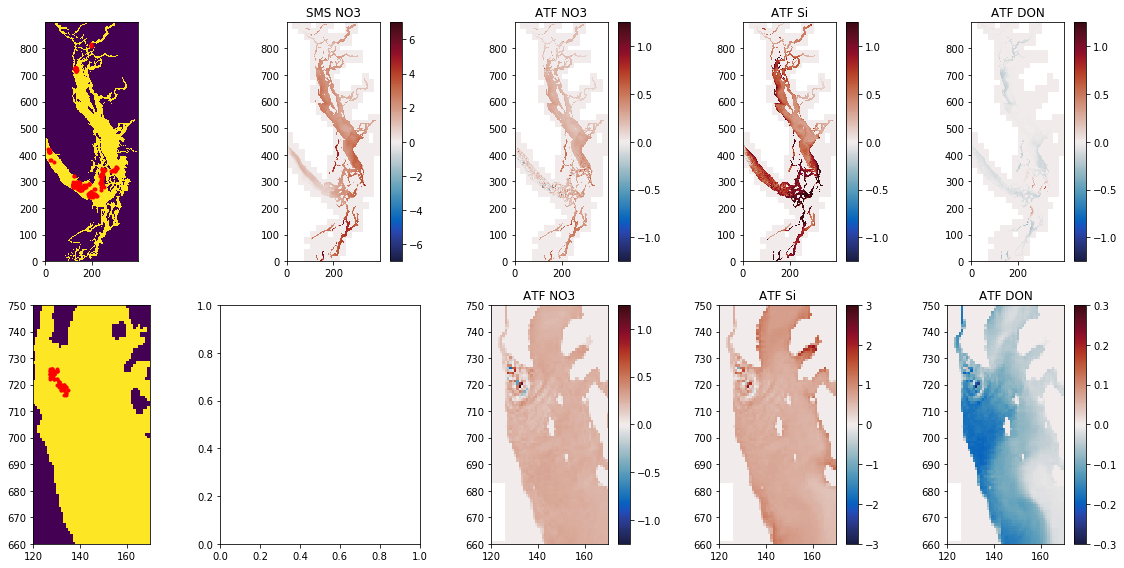

In [23]:
fig,ax=plt.subplots(2,5,figsize=(16,8))
ax=ax.flatten()
cm1=cmocean.cm.balance
ax[0].pcolormesh(tmask[0,:,:])
ax[0].plot(ind[:,2],ind[:,1],'r.')
viz_tools.set_aspect(ax[0])

iax=ax[5]
iax.pcolormesh(tmask[0,:,:])
iax.plot(ind[:,2],ind[:,1],'r.')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
viz_tools.set_aspect(iax)

iax=ax[1]
m=iax.pcolormesh(fD2.variables['SMS_NO3'][-1,24,:,:],cmap=cm1,vmin=-7,vmax=7)
iax.set_title('SMS NO3')
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)
viz_tools.set_aspect(iax)

iax=ax[2]
m=iax.pcolormesh(fD.variables['ATF_NO3'][-1,24,:,:],cmap=cm1,vmin=-1.25,vmax=1.25)
iax.set_title('ATF NO3')
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

iax=ax[3]
m=iax.pcolormesh(fD.variables['ATF_Si'][-1,24,:,:],cmap=cm1,vmin=-1.25,vmax=1.25)
iax.set_title('ATF Si')
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

iax=ax[4]
m=iax.pcolormesh(fD.variables['ATF_DON'][-1,24,:,:],cmap=cm1,vmin=-1.25,vmax=1.25)
iax.set_title('ATF DON')
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

iax=ax[7]
m=iax.pcolormesh(fD.variables['ATF_NO3'][-1,24,:,:],cmap=cm1,vmin=-1.25,vmax=1.25)
iax.set_title('ATF NO3')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

iax=ax[8]
m=iax.pcolormesh(fD.variables['ATF_Si'][-1,24,:,:],cmap=cm1,vmin=-3,vmax=3)
iax.set_title('ATF Si')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

iax=ax[9]
m=iax.pcolormesh(fD.variables['ATF_DON'][-1,24,:,:],cmap=cm1,vmin=-.3,vmax=.3)
iax.set_title('ATF DON')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

plt.tight_layout()

In [28]:
ma1=np.broadcast_to(tmask,np.shape(fP.variables['TB2_NO3']))
print('max abs TB2NO3-TB1NO3', np.max(np.abs(np.ma.masked_where(ma1==0,fP.variables['TB2_NO3'][:]-fP.variables['TB1_NO3'][:]))))
print('max abs TB3NO3-TB2NO3', np.max(np.abs(np.ma.masked_where(ma1==0,fP.variables['TB3_NO3'][:]-fP.variables['TB2_NO3'][:]))))

max abs TB2NO3-TB1NO3 23.560547
max abs TB3NO3-TB2NO3 0.0


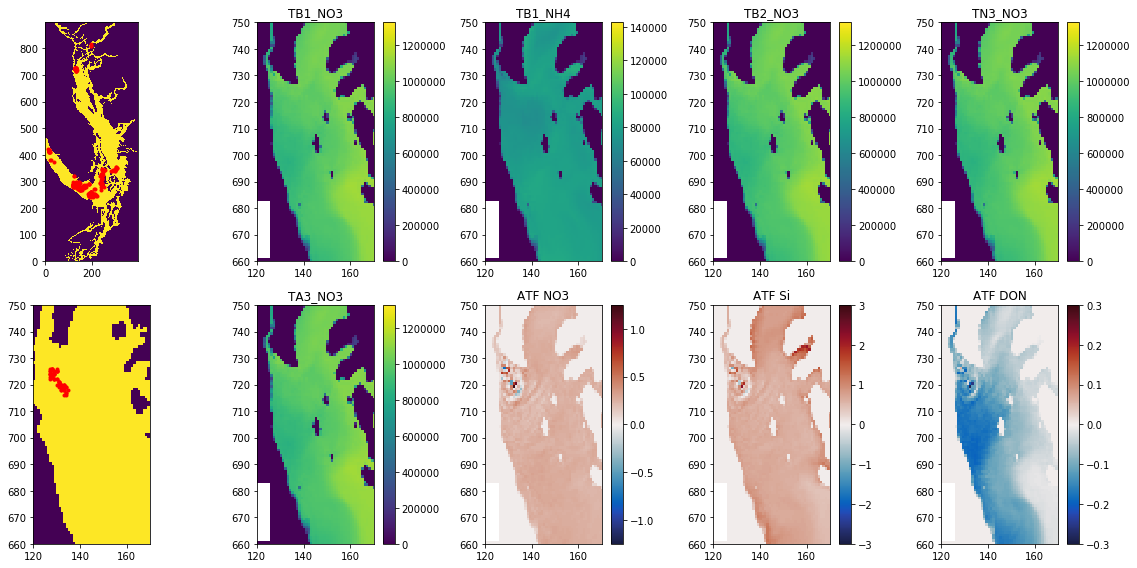

In [32]:
fig,ax=plt.subplots(2,5,figsize=(16,8))
ax=ax.flatten()
cm1=cmocean.cm.balance
ax[0].pcolormesh(tmask[0,:,:])
ax[0].plot(ind[:,2],ind[:,1],'r.')
viz_tools.set_aspect(ax[0])

iax=ax[5]
iax.pcolormesh(tmask[0,:,:])
iax.plot(ind[:,2],ind[:,1],'r.')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
viz_tools.set_aspect(iax)

iax=ax[1]
m=iax.pcolormesh(fP.variables['TB1_NO3'][-1,24,:,:])
iax.set_title('TB1_NO3')
fig.colorbar(m,ax=iax)
iax.set_xlim(120,170)
iax.set_ylim(660,750)
viz_tools.set_aspect(iax)

iax=ax[2]
m=iax.pcolormesh(fP.variables['TB1_NH4'][-1,24,:,:])
iax.set_title('TB1_NH4')
fig.colorbar(m,ax=iax)
iax.set_xlim(120,170)
iax.set_ylim(660,750)
viz_tools.set_aspect(iax)

iax=ax[3]
m=iax.pcolormesh(fP.variables['TB2_NO3'][-1,24,:,:])
iax.set_title('TB2_NO3')
fig.colorbar(m,ax=iax)
iax.set_xlim(120,170)
iax.set_ylim(660,750)
viz_tools.set_aspect(iax)

iax=ax[4]
m=iax.pcolormesh(fP.variables['TN3_NO3'][-1,24,:,:])
iax.set_title('TN3_NO3')
fig.colorbar(m,ax=iax)
iax.set_xlim(120,170)
iax.set_ylim(660,750)
viz_tools.set_aspect(iax)

iax=ax[6]
m=iax.pcolormesh(fP.variables['TA3_NO3'][-1,24,:,:])
iax.set_title('TA3_NO3')
fig.colorbar(m,ax=iax)
iax.set_xlim(120,170)
iax.set_ylim(660,750)
viz_tools.set_aspect(iax)

iax=ax[7]
m=iax.pcolormesh(fD.variables['ATF_NO3'][-1,24,:,:],cmap=cm1,vmin=-1.25,vmax=1.25)
iax.set_title('ATF NO3')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

iax=ax[8]
m=iax.pcolormesh(fD.variables['ATF_Si'][-1,24,:,:],cmap=cm1,vmin=-3,vmax=3)
iax.set_title('ATF Si')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

iax=ax[9]
m=iax.pcolormesh(fD.variables['ATF_DON'][-1,24,:,:],cmap=cm1,vmin=-.3,vmax=.3)
iax.set_title('ATF DON')
iax.set_xlim(120,170)
iax.set_ylim(660,750)
fig.colorbar(m,ax=iax)
viz_tools.set_aspect(iax)

plt.tight_layout()